In [1]:
# Importing Important Useful Libraries
import numpy as np
import pandas as  pd
import math
import operator
from collections import Counter
import copy
import random
import matplotlib.pyplot as plt
from csv import reader
from sys import exit
from math import sqrt

In [2]:
# Reading test data sets and training data sets

train_Set_df = pd.read_table('data/segmentation_train.txt', delimiter=',', names=('Class','REGION-CENTROID-COL','REGION-CENTROID-ROW','REGION-PIXEL-COUNT','SHORT-LINE-DENSITY-5','SHORT-LINE-DENSITY-2','VEDGE-MEAN','VEDGE-SD','HEDGE-MEAN','HEDGE-SD','INTENSITY-MEAN','RAWRED-MEAN','RAWBLUE-MEAN','RAWGREEN-MEAN','EXRED-MEAN','EXBLUE-MEAN','EXGREEN-MEAN','VALUE-MEAN','SATURATION-MEAN','HUE-MEAN'),
                   dtype={'Class':np.string_,'REGION-CENTROID-COL':np.float64, 'REGION-CENTROID-ROW':np.float64, 'REGION-PIXEL-COUNT':np.float64, 'SHORT-LINE-DENSITY-5':np.float64,'SHORT-LINE-DENSITY-2':np.float64,'VEDGE-MEAN':np.float64,'VEDGE-SD':np.float64,'HEDGE-MEAN':np.float64,'HEDGE-SD':np.float64,'INTENSITY-MEAN':np.float64,'RAWRED-MEAN':np.float64,'RAWBLUE-MEAN':np.float64,'RAWGREEN-MEAN':np.float64,'EXRED-MEAN':np.float64,'EXBLUE-MEAN':np.float64,'EXGREEN-MEAN':np.float64,'VALUE-MEAN':np.float64,'SATURATION-MEAN':np.float64,'HUE-MEAN':np.float64})


# X will represent the Data Set
train_x = train_Set_df.drop('Class',axis=1)

# Y will represent the label on that data
train_y = train_Set_df.Class



In [3]:
test_Set_df = pd.read_table('data/segmentation_test.txt', delimiter=',', names=('Class','REGION-CENTROID-COL','REGION-CENTROID-ROW','REGION-PIXEL-COUNT','SHORT-LINE-DENSITY-5','SHORT-LINE-DENSITY-2','VEDGE-MEAN','VEDGE-SD','HEDGE-MEAN','HEDGE-SD','INTENSITY-MEAN','RAWRED-MEAN','RAWBLUE-MEAN','RAWGREEN-MEAN','EXRED-MEAN','EXBLUE-MEAN','EXGREEN-MEAN','VALUE-MEAN','SATURATION-MEAN','HUE-MEAN'),
                   dtype={'Class':np.string_,'REGION-CENTROID-COL':np.float64, 'REGION-CENTROID-ROW':np.float64, 'REGION-PIXEL-COUNT':np.float64, 'SHORT-LINE-DENSITY-5':np.float64,'SHORT-LINE-DENSITY-2':np.float64,'VEDGE-MEAN':np.float64,'VEDGE-SD':np.float64,'HEDGE-MEAN':np.float64,'HEDGE-SD':np.float64,'INTENSITY-MEAN':np.float64,'RAWRED-MEAN':np.float64,'RAWBLUE-MEAN':np.float64,'RAWGREEN-MEAN':np.float64,'EXRED-MEAN':np.float64,'EXBLUE-MEAN':np.float64,'EXGREEN-MEAN':np.float64,'VALUE-MEAN':np.float64,'SATURATION-MEAN':np.float64,'HUE-MEAN':np.float64})

# X will represent the Data Set
test_x = test_Set_df.drop('Class', axis=1)

# Y will represent the label on that data
test_y = test_Set_df.Class

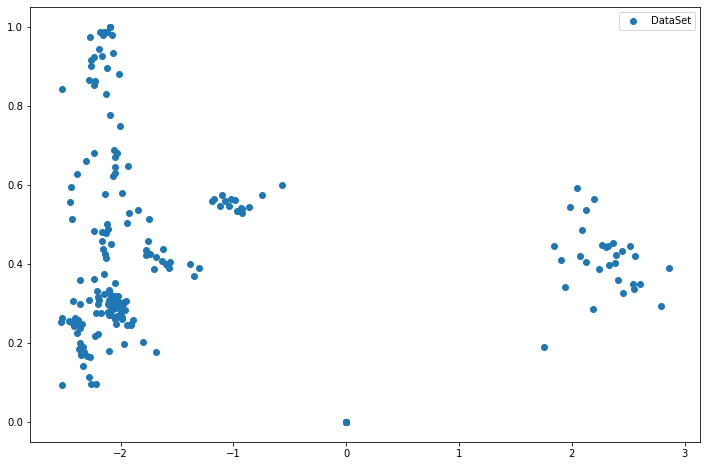

In [4]:
# Visualization of Data before clustering"

train_labels = copy.deepcopy(train_y)
test_Data = np.array(copy.deepcopy(test_x))


fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(test_Data[:,-1], test_Data[:,-2],label="DataSet")

ax.legend()

In [5]:
# K_Means Starts Here -> 

In [6]:
# Loading the data for K-Means

def load_data(filename, limit):
    file = open(filename, "r")

    data = []
    labels = []
    count = 0

    for line in file:

        temp = line.split(",")   # Parsing the data
        _class = temp.pop(0)     # Splitting the Labels 
        
        temp = list((float(num) for num in temp))
        
        data.append(temp)
        labels.append(_class)

        count += 1

        if count == limit:
            print(data)
            break

    file.close()

    return np.array(data), np.array(labels)

In [7]:
train_x1,labels1 = load_data ("data/segmentation_train.txt", 500)

[[110.0, 189.0, 9.0, 0.0, 0.0, 1.0000004, 0.66666675, 1.2222223, 1.1863422, 12.925926, 10.888889, 9.222222, 18.666668, -6.111111, -11.111111, 17.222221, 18.666668, 0.50813884, 1.9108642], [86.0, 187.0, 9.0, 0.0, 0.0, 1.1111108, 0.7200825, 1.4444445, 0.750309, 13.740741, 11.666667, 10.333334, 19.222221, -6.2222223, -10.222222, 16.444445, 19.222221, 0.46332908, 1.9414649], [225.0, 244.0, 9.0, 0.0, 0.0, 3.3888886, 2.1951127, 2.9999998, 1.5202343, 12.259259, 10.333334, 9.333334, 17.11111, -5.7777777, -8.777778, 14.555555, 17.11111, 0.48014903, 1.9879022], [47.0, 232.0, 9.0, 0.0, 0.0, 1.2777778, 1.254621, 1.0, 0.8944273, 12.703704, 11.0, 9.0, 18.11111, -5.111111, -11.111111, 16.222221, 18.11111, 0.50096595, 1.875362], [97.0, 186.0, 9.0, 0.0, 0.0, 1.1666671, 0.6912147, 1.1666671, 1.0055404, 15.592592, 13.888889, 11.777778, 21.11111, -5.111111, -11.444445, 16.555555, 21.11111, 0.44266057, 1.8636538], [157.0, 221.0, 9.0, 0.0, 0.0, 1.0555555, 0.6469299, 1.2222222, 0.6206328, 12.111111, 10.22222

In [8]:
# Assign every training example x^(i) to its closest centroid, given the current centroid positions
def find_closest_centroids(X, centroids):
    '''returns the array of assigned clusters to each example ''' 
    m = X.shape[0] # no of datappints
    k = centroids.shape[0]  #division size
    idx = np.zeros(m) # array to assign the centriod
    
    for i in range (X.shape[0]):
        distances = np.linalg.norm(X[i]-centroids, axis=1)
        min_dist = np.argmin(distances)
        idx[i] = min_dist
    
    
    return idx

In [9]:
# Update Centroids
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))  #3*4
    
    for i in range(k):
        centroids[i,:] = np.mean(X[idx.ravel() == i,:], axis = 0)
    
    return centroids        

In [10]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        # find closest centroid
        idx = find_closest_centroids(X, centroids)
        #update centroids
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids
 

In [11]:
X=train_x1    # Storing data in variable X
np.random.shuffle(X)   # Randomly shuffling the data
cluster1 = X[0:50,:]
cluster2 = X[50:100,:]
cluster3 = X[100:150,:]

In [12]:
initial_centroids = initial_centroids = np.array([X[random.randint(0,50)], X[random.randint(50,100)], X[random.randint(100,150)]])
# Select k=3 , pick 3 random centroids from data
idx, centroids = run_k_means(X, initial_centroids, 2000)# use 1000 iterations to perform clustering

In [13]:
k_Meancluster1 = X[np.where(idx == 0)[0],:]
k_Meancluster2 = X[np.where(idx == 1)[0],:]
k_Meancluster3 = X[np.where(idx == 2)[0],:]

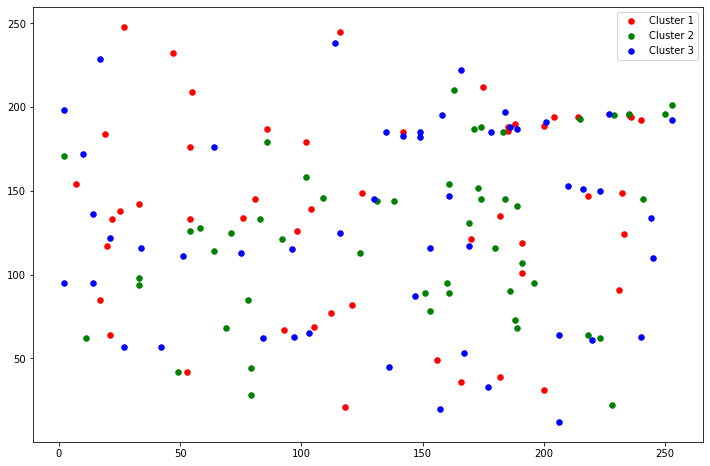

In [14]:
fig, ax = plt.subplots(figsize=(12,8))   # Visualizing initial clusters
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()


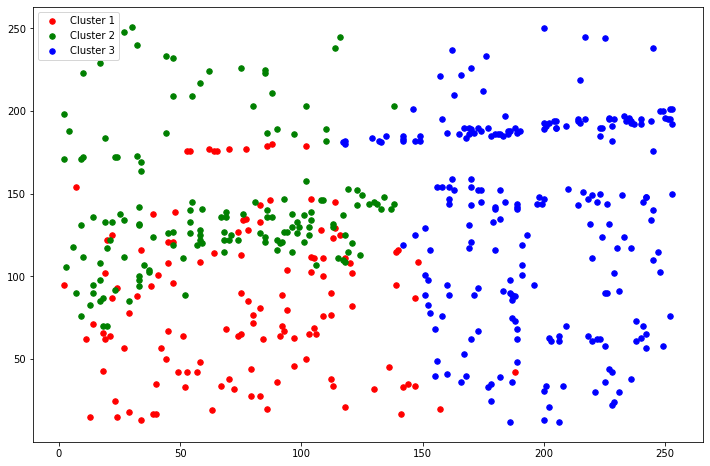

In [15]:
fig, ax = plt.subplots(figsize=(12,8))     # Visualizing K-Means Clusters
ax.scatter(k_Meancluster1[:,0], k_Meancluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(k_Meancluster2[:,0], k_Meancluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(k_Meancluster3[:,0], k_Meancluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

In [16]:
# Davies Bouldin Index Calculated Here ->

In [17]:
def euclidean_distance(x, y):  # Calculating Euclidean Distance
    return np.sqrt(np.sum((x - y) ** 2))

In [18]:
def compute_s(i, x, labels, clusters):    # Calculating the value for S
    norm_c= len(clusters)
    s = 0
    for c in clusters:
        s += euclidean_distance(c, clusters[i])
    return s/norm_c

In [19]:
def compute_Rij(i, j, x, labels, clusters, n):    # Calculating R(i,j)
    d = euclidean_distance(clusters[i],clusters[j])
    s_i = compute_s(i,X,labels,clusters)
    s_j = compute_s(j,X,labels,clusters)
    
    if d !=0:
        Rij = (s_i + s_j)/d
    else:
        Rij = 0
    return Rij

In [20]:
def compute_R(X, labels, clusters, n): 
    _max = -999999
    
    for i in range(n):
        for j in range(n):
            if(i!=j):
                temp = compute_Rij(i, j, X, labels, clusters, n)
                _max = max(_max,temp)

    return _max

In [21]:
def compute_DB_index(x, labels, clusters, n):   # Calculating Davies Bouldin Index
    _sum = 0
    for i in range(n):
        R = compute_R(X, labels, clusters, n)
        _sum+=R
    DB_index = _sum/n
    return DB_index

In [22]:
compute_DB_index(X, labels1, centroids, 3)     # Testing the index

1.402993019611397

In [23]:
#KNN Starts here ->

In [24]:
def calculate_Dis(A,B):
  # We wil calculate A-B
  # Here A = "TrainInstance"
  # Here B = "TestInstance"
  return np.linalg.norm(np.subtract(B, A))

In [25]:
def getNeighbors(trainset, testInstance, K_neighbors, trainlabels):
  distances = []
  for i in range(len(trainset)):
    distances.append((calculate_Dis(trainset[i], testInstance), trainlabels[i]))
  distances.sort(key=lambda x: x[0])
  return distances[:K_neighbors]

In [26]:
def makeKNNPredicrion(testNeighbors):
    # For neighbors of each instance of Test Set
    prediction = []
    itr = 1
    
    for neighbors in testNeighbors:  
      class_counter = Counter()
      for neighbor in neighbors:
          class_counter[neighbor[1]] += 1
      prediction.append((itr,class_counter.most_common(1)[0][0]))
      itr += 1
    return prediction

In [27]:
def createMatrix(prediction, actual):
  indexes = np.unique(actual)
  df = pd.DataFrame(0, columns =indexes, 
                   index = indexes)
  for i in range(len(actual)):
    if (prediction[i] == actual[i]):
      df.loc[prediction[i][1]][actual[i]] += 1
    else:
      df.loc[prediction[i][1]][actual[i]] += 1
  return df  

In [28]:
def get_evaluation_variables(matrix, class_, classes_):   # Getting the evaluation parameters
  tp = matrix[class_][class_]
  
  fp = 0
  for i in range(len(classes_)):
    if classes_[i] != class_:
      fp += matrix[class_][classes_[i]]

  fn = 0
  for i in range(len(classes_)):
    if classes_[i] != class_:
      fn += matrix[classes_[i]][class_]
  
  tn = 0
  for i in range(len(classes_)):
    if classes_[i] != class_:
      for j in range(len(classes_)):
        if classes_[j] != class_:
          tn += matrix[classes_[i]][classes_[j]]
  
  eval_variables_dict = {'Tp':tp, 'Tn':tn, 'Fp':fp, 'Fn':fn}
  return eval_variables_dict 

In [29]:
def cal_evaluations(predictions, actual):    # Calculating evaluation parameters
  matrix_df = createMatrix(predictions, actual)
  t_classes = np.unique(actual)
  evaluation_variables = dict()
  for i in range(len(t_classes)):
    evaluation_variables[t_classes[i]] = get_evaluation_variables(matrix_df, t_classes[i], t_classes)
  evaluations_dict = dict()
  for i in range(len(t_classes)):
    class_ = t_classes[i]
    tp = evaluation_variables[t_classes[i]]['Tp']
    tn = evaluation_variables[t_classes[i]]['Tn']
    fp = evaluation_variables[t_classes[i]]['Fp']
    fn = evaluation_variables[t_classes[i]]['Fn']

    
    accuracy = (tp + tn)/(tp + tn + fp + fn )
    evaluations_dict[class_] = dict()
    evaluations_dict[class_]['Accuracy'] = accuracy

    precision = (tp)/(tp+fp)
    evaluations_dict[class_]['Precision'] = precision
    
    recall = (tp)/(fn+tp)
    evaluations_dict[class_]['Recall'] = recall

    f1 = (2*precision*recall)/(precision+recall)
    evaluations_dict[class_]['F-1'] = f1
  
  return evaluations_dict

In [30]:
def KNN(trainset, testset, trainlabels, testlabel, K):
    # For each instance of Test Data we have a list of K neighbors
    testNeighbors = []
    prediction = []
    for i in range(len(testset)):
        testNeighbors.append(getNeighbors(trainset, testset[i], K, trainlabels))
    predictions = makeKNNPredicrion(testNeighbors)
    return predictions

In [31]:
def visualize(testlabels, predictions, testset):    # Visualizing the data
  colors = {'BRICKFACE':'r' ,'CEMENT':'g', 'FOLIAGE':'b', 'GRASS':'c', 'PATH':'m', 'SKY':'y', 'WINDOW':'k'}
  fig, ax = plt.subplots(figsize=(12,8))

  prediction = ''
  for i in range(len(testset)):
    
    for label in testlabels:
      if label == predictions[i][1]:
        prediction = label
        break
    color_ = colors[prediction]
    label_ = "Cluster "+str(prediction)
    ax.scatter(testset[i][-1], testset[i][-2], color=color_, )
  ax.legend()

In [32]:
def run_KNN(trainset_, testset_, trainlabels_, testlabels_, iterations):   # Formula to run KNN
  k = int(math.sqrt(len(testset_)))
  print("For Optimal Value of K, K = ",k)
  for i in range(iterations):
    
    if i > 0 :
      k = random.randint(0,len(testset_))
      print("For K = ",k)
    
    predicted_result = KNN(trainset_, testset_, trainlabels_, testlabels_, k)
    
    eval_results = cal_evaluations(predicted_result,testlabels_ )

    for key in eval_results.keys():
      print("For Class = ",key, ": ", eval_results[key])
    visualize(testlabels_, predicted_result, testset_)
    #print(predicted_result)

For Optimal Value of K, K =  14
For Class =  BRICKFACE :  {'Accuracy': 0.9761904761904762, 'Precision': 1.0, 'Recall': 0.8571428571428571, 'F-1': 0.923076923076923}
For Class =  CEMENT :  {'Accuracy': 0.9714285714285714, 'Precision': 0.8666666666666667, 'Recall': 0.9285714285714286, 'F-1': 0.896551724137931}
For Class =  FOLIAGE :  {'Accuracy': 0.9714285714285714, 'Precision': 0.9, 'Recall': 0.9, 'F-1': 0.9}
For Class =  GRASS :  {'Accuracy': 0.9952380952380953, 'Precision': 1.0, 'Recall': 0.967741935483871, 'F-1': 0.9836065573770492}
For Class =  PATH :  {'Accuracy': 0.9952380952380953, 'Precision': 1.0, 'Recall': 0.967741935483871, 'F-1': 0.9836065573770492}
For Class =  SKY :  {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F-1': 1.0}
For Class =  WINDOW :  {'Accuracy': 0.9666666666666667, 'Precision': 0.8, 'Recall': 0.96, 'F-1': 0.8727272727272728}


No handles with labels found to put in legend.


For K =  16
For Class =  BRICKFACE :  {'Accuracy': 0.9714285714285714, 'Precision': 1.0, 'Recall': 0.8333333333333334, 'F-1': 0.9090909090909091}
For Class =  CEMENT :  {'Accuracy': 0.9666666666666667, 'Precision': 0.8333333333333334, 'Recall': 0.9259259259259259, 'F-1': 0.8771929824561403}
For Class =  FOLIAGE :  {'Accuracy': 0.9666666666666667, 'Precision': 0.9, 'Recall': 0.8709677419354839, 'F-1': 0.8852459016393444}
For Class =  GRASS :  {'Accuracy': 0.9952380952380953, 'Precision': 1.0, 'Recall': 0.967741935483871, 'F-1': 0.9836065573770492}
For Class =  PATH :  {'Accuracy': 0.9952380952380953, 'Precision': 1.0, 'Recall': 0.967741935483871, 'F-1': 0.9836065573770492}
For Class =  SKY :  {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F-1': 1.0}
For Class =  WINDOW :  {'Accuracy': 0.9619047619047619, 'Precision': 0.7666666666666667, 'Recall': 0.9583333333333334, 'F-1': 0.8518518518518519}


No handles with labels found to put in legend.


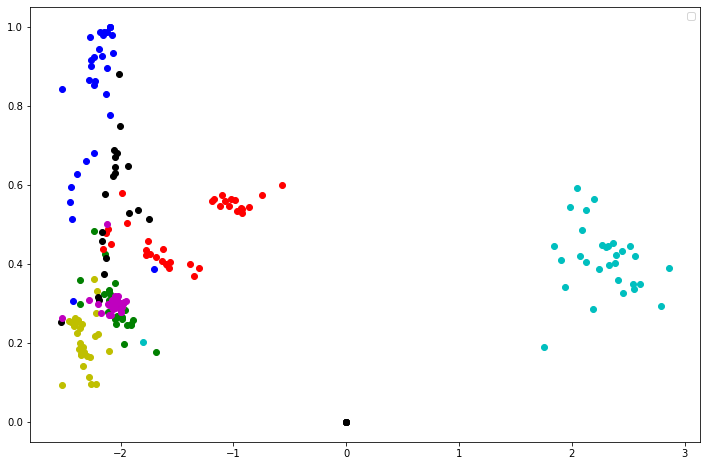

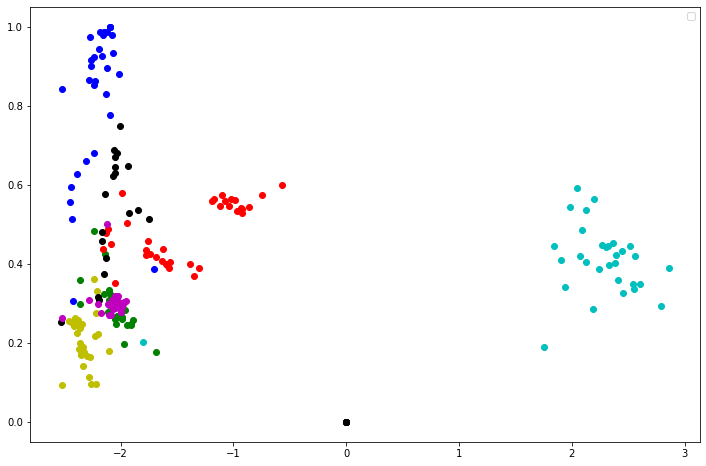

In [33]:
run_KNN(np.array(train_x), np.array(test_x),train_y, np.array(test_y), 2)   # Testing KNN